In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [215]:
df =  pd.read_csv('./data/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


- 비대오게임 판매 분석 시각화

### 비디오 게임

- 순위
- 이름
- 플랫폼
- 출시연도
- 장르
- 퍼블리셔
- 북미매출
- 유럽매출
- 일본매출
- 기타매출
- 전세계매출

In [216]:
df[['Rank', 'Name', 'Platform','Year', 'Genre', 'Publisher', 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df.columns = ['순위','이름','플랫폼','출시연도','장르','퍼블리셔','북미매출','유럽매출','일본매출','기타매출','전세계매출']
print(df.shape)
print(df.info())
df.head()

(16598, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      16598 non-null  int64  
 1   이름      16598 non-null  object 
 2   플랫폼     16598 non-null  object 
 3   출시연도    16327 non-null  float64
 4   장르      16598 non-null  object 
 5   퍼블리셔    16540 non-null  object 
 6   북미매출    16598 non-null  float64
 7   유럽매출    16598 non-null  float64
 8   일본매출    16598 non-null  float64
 9   기타매출    16598 non-null  float64
 10  전세계매출   16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


,순위,이름,플랫폼,출시연도,장르,퍼블리셔,북미매출,유럽매출,일본매출,기타매출,전세계매출
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


-null 값이 많이 없는 관계로 null값 제외

In [217]:
df.dropna(inplace=True)

In [218]:
df.isnull().sum()

순위       0
이름       0
플랫폼      0
출시연도     0
장르       0
퍼블리셔     0
북미매출     0
유럽매출     0
일본매출     0
기타매출     0
전세계매출    0
dtype: int64

1. 어떤 장르의 게임이 가장 많이 출시하였는가

In [219]:
df['장르'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: 장르, dtype: int64

<AxesSubplot: xlabel='장르', ylabel='count'>

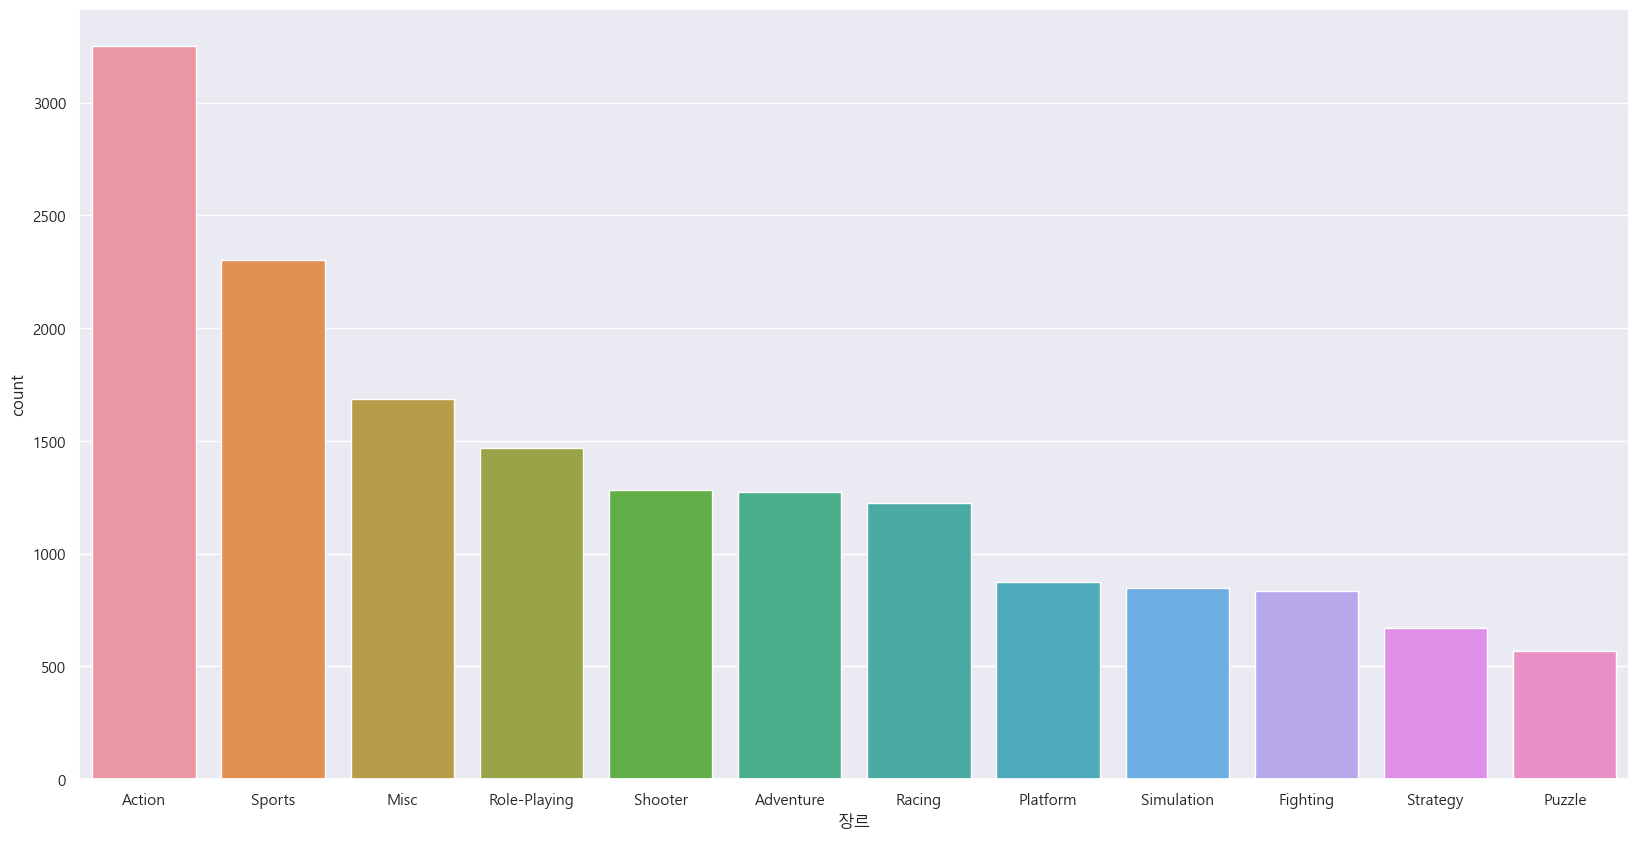

In [220]:
plt.figure(figsize=(20,10))
sns.countplot(data = df , x ='장르', order = df['장르'].value_counts().index)

-Action장르가 3251개 Sports장르가 2304 출시 했다.

2.게임 출시가 많은 연도

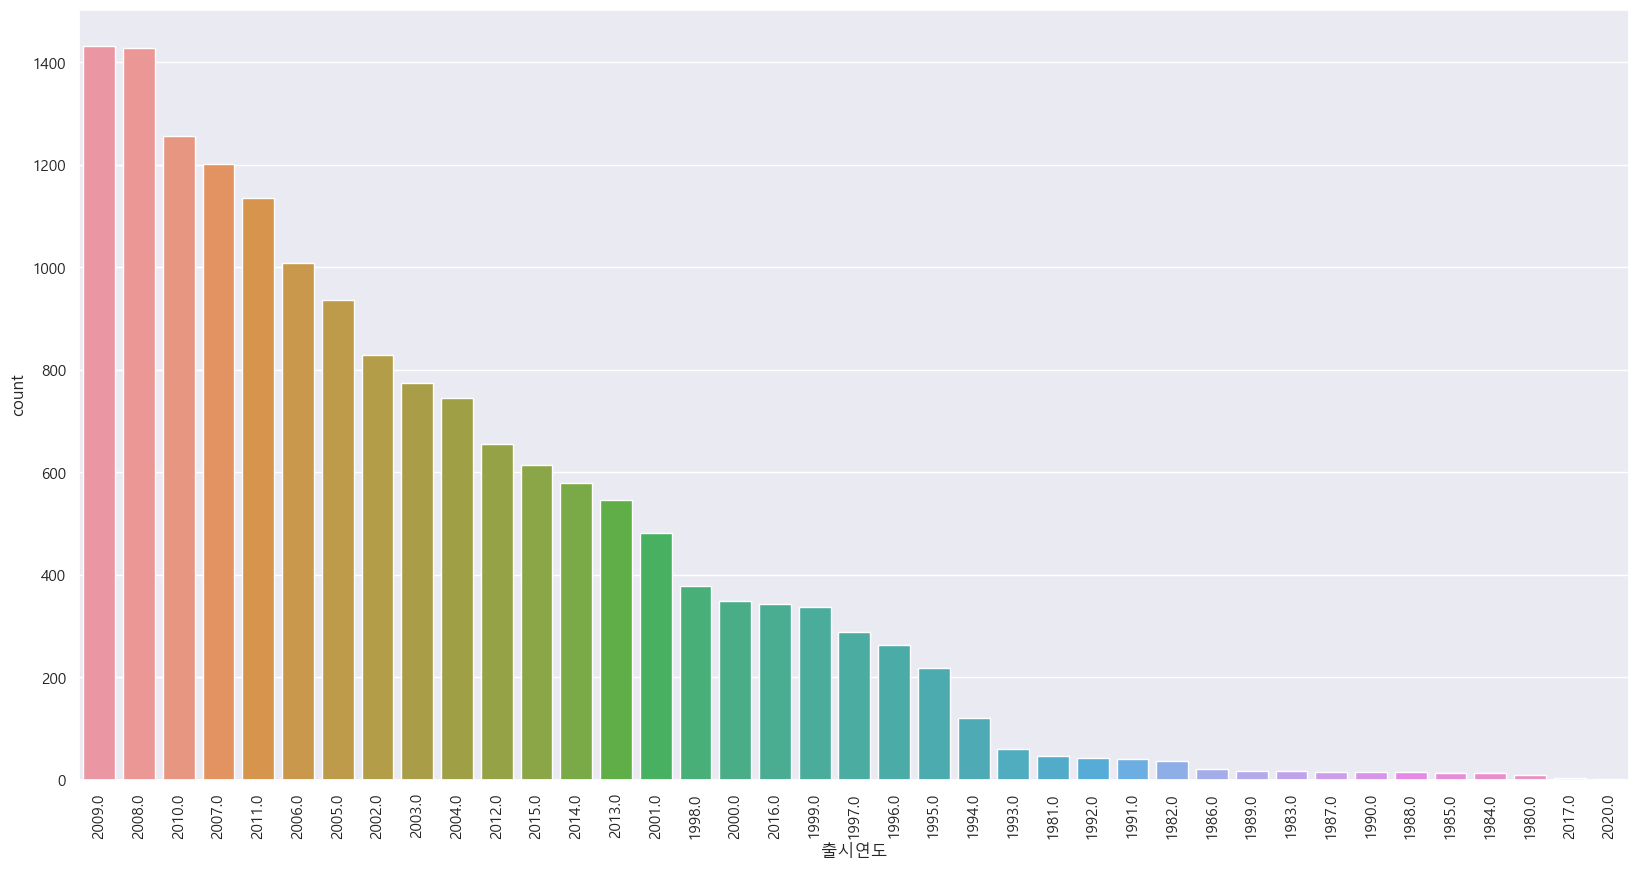

In [221]:
plt.figure(figsize=(20,10))
sns.countplot(x = '출시연도', data = df, order = df.groupby(by = ['출시연도'])['이름'].count().sort_values(ascending=False).index)
plt.xticks(rotation = 90)
pass

-2009년에 1451개로 출시를 제일 많이 했다.

3. 장르별 출시 상위5년 게임

<AxesSubplot: xlabel='출시연도', ylabel='count'>

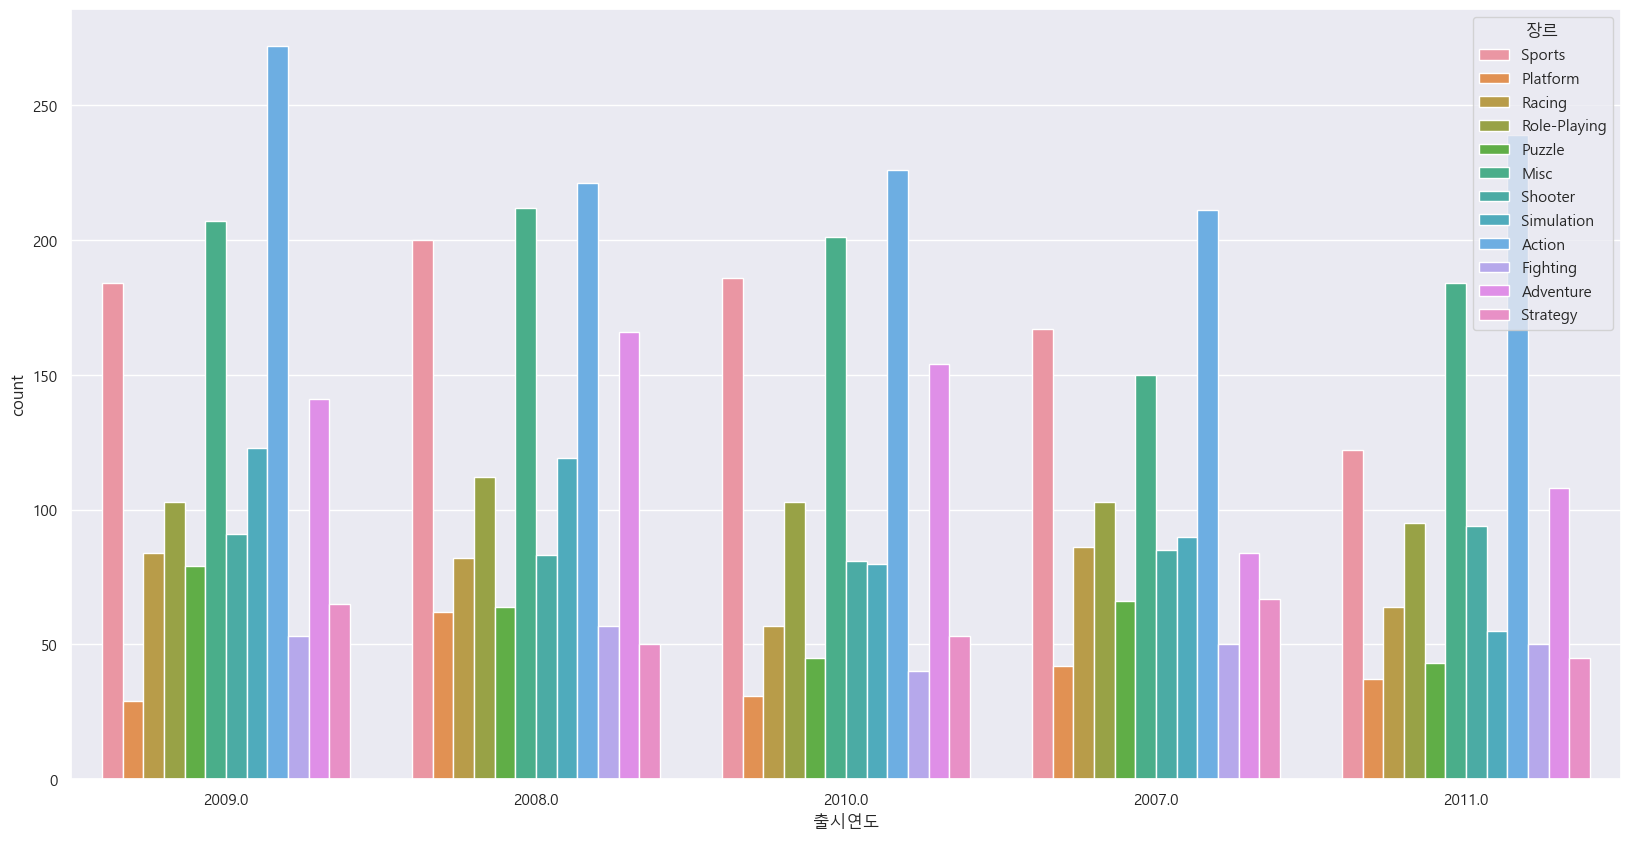

In [222]:
plt.figure(figsize=(20,10))
sns.countplot(x = '출시연도', data = df, hue = '장르', order = df['출시연도'].value_counts().iloc[:5].index)

4. 세계적으로 가장 많이 팔린 연도

In [223]:
df_year = df.groupby(by = ['출시연도'])['전세계매출'].sum()
df_year = df_year.reset_index()

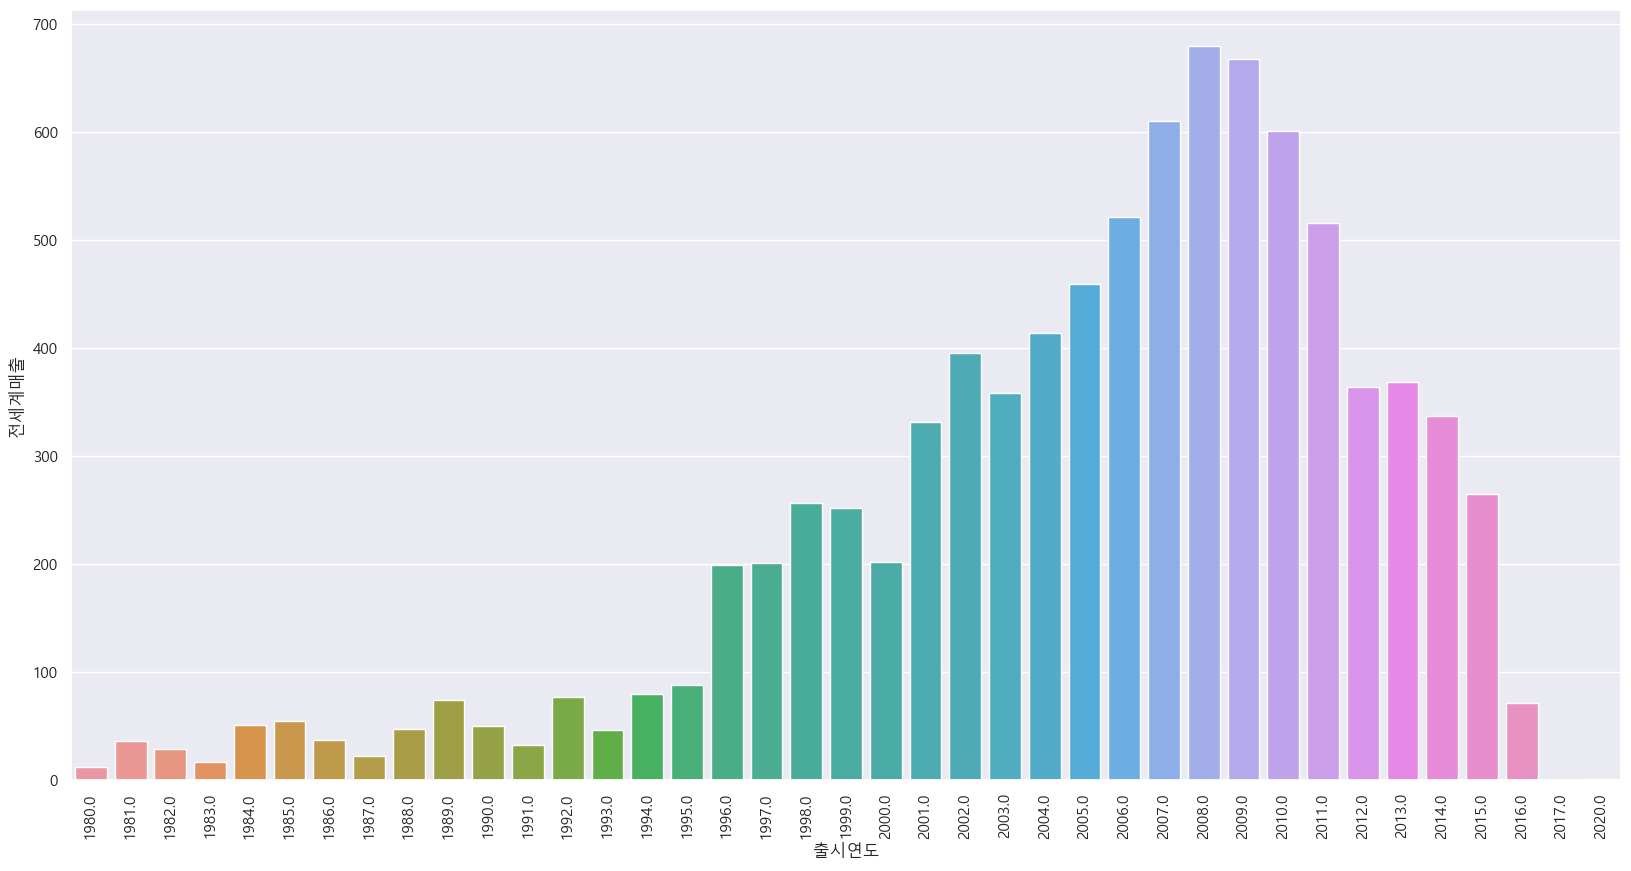

In [224]:
plt.figure(figsize=(20,10))
sns.barplot(x = '출시연도', y = '전세계매출', data = df_year)
plt.xticks(rotation=90)
pass

-2006년은 상위5개 게임에 포함되지않았지만, 상위5개 가장 많이 판매되었다.

5. 1년 동안 출시 많이된 장르

In [225]:
year_df = df.groupby(['출시연도', '장르']).size().reset_index(name='count')
year_max = year_df.groupby(['출시연도'])['count'].transform(max) == year_df['count']
year_genre = year_df[year_max].reset_index(drop=True)
year_genre = year_genre.drop_duplicates(subset=["출시연도", "count"], keep='last').reset_index(drop=True)

In [226]:
genre = year_genre['장르'].values

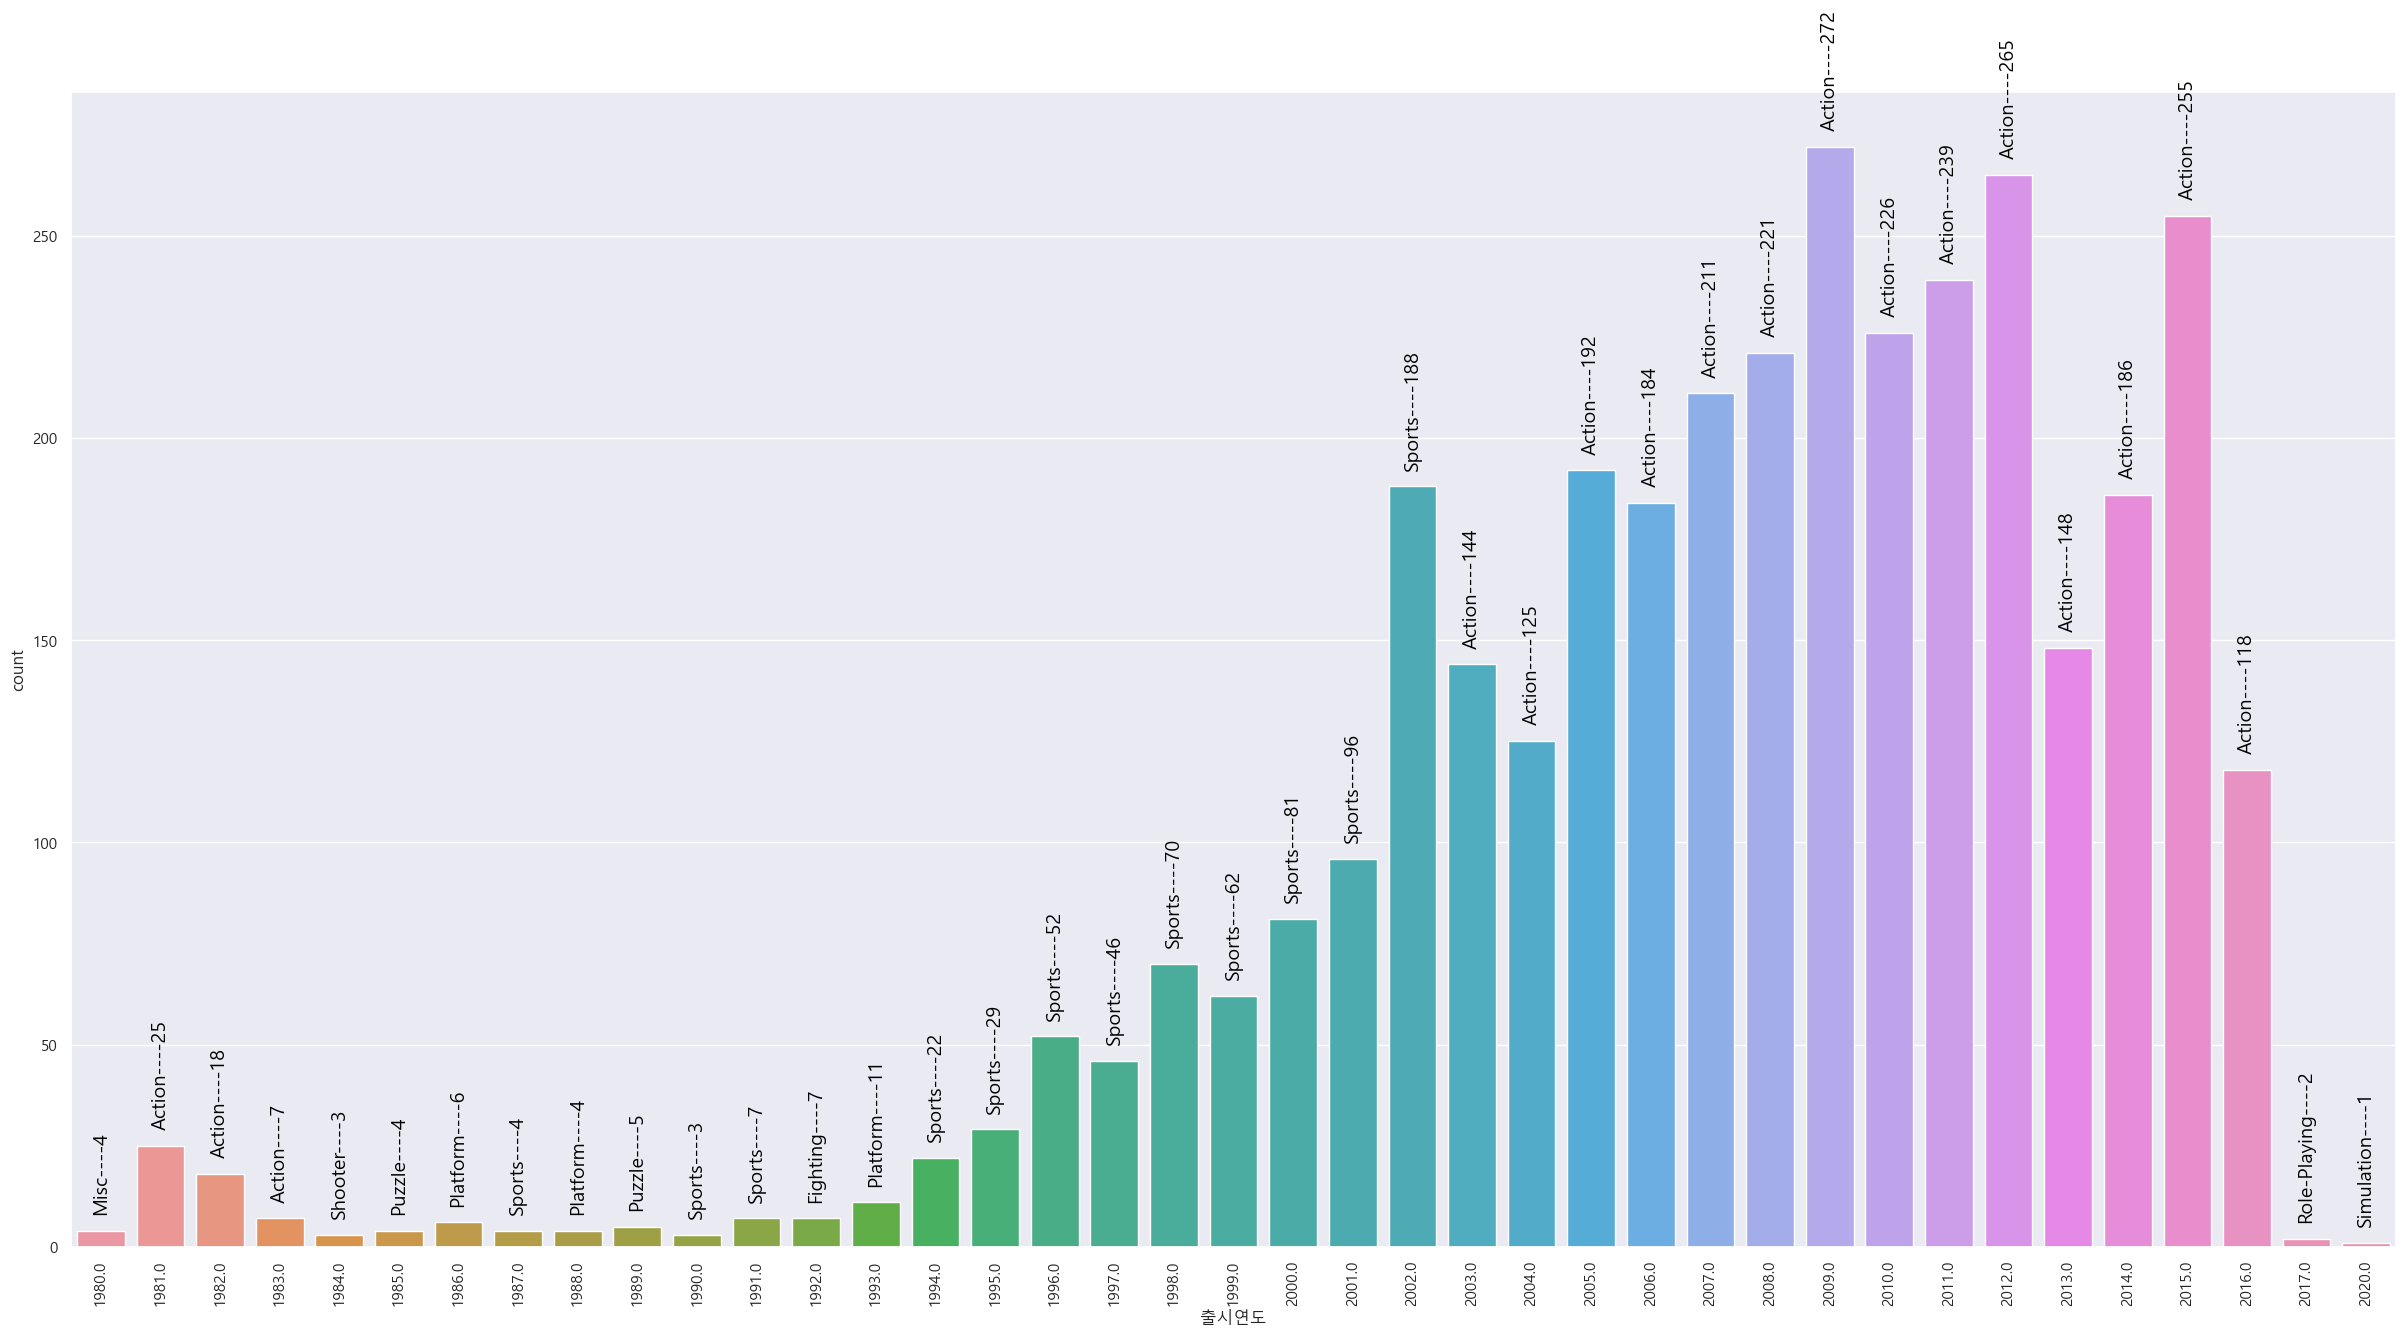

In [227]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='출시연도', y='count', data=year_genre)
index = 0
for value in year_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
pass

-2002년 전에는 Sporst장르 게임이 출시를 많이 했지만, 2003년부터 Action장르가 많이 출시했다.

6. 1년동안 가장 많이 팔린 장르

In [228]:
year_sale_df = df.groupby(by = ['출시연도','장르'])['전세계매출'].sum().reset_index()
year_sale = year_sale_df.groupby(by = ['출시연도'])['전세계매출'].transform(max) == year_sale_df['전세계매출']
year_sale_max = year_sale_df[year_sale].reset_index(drop=True)

In [229]:
genre = year_sale_max['장르']

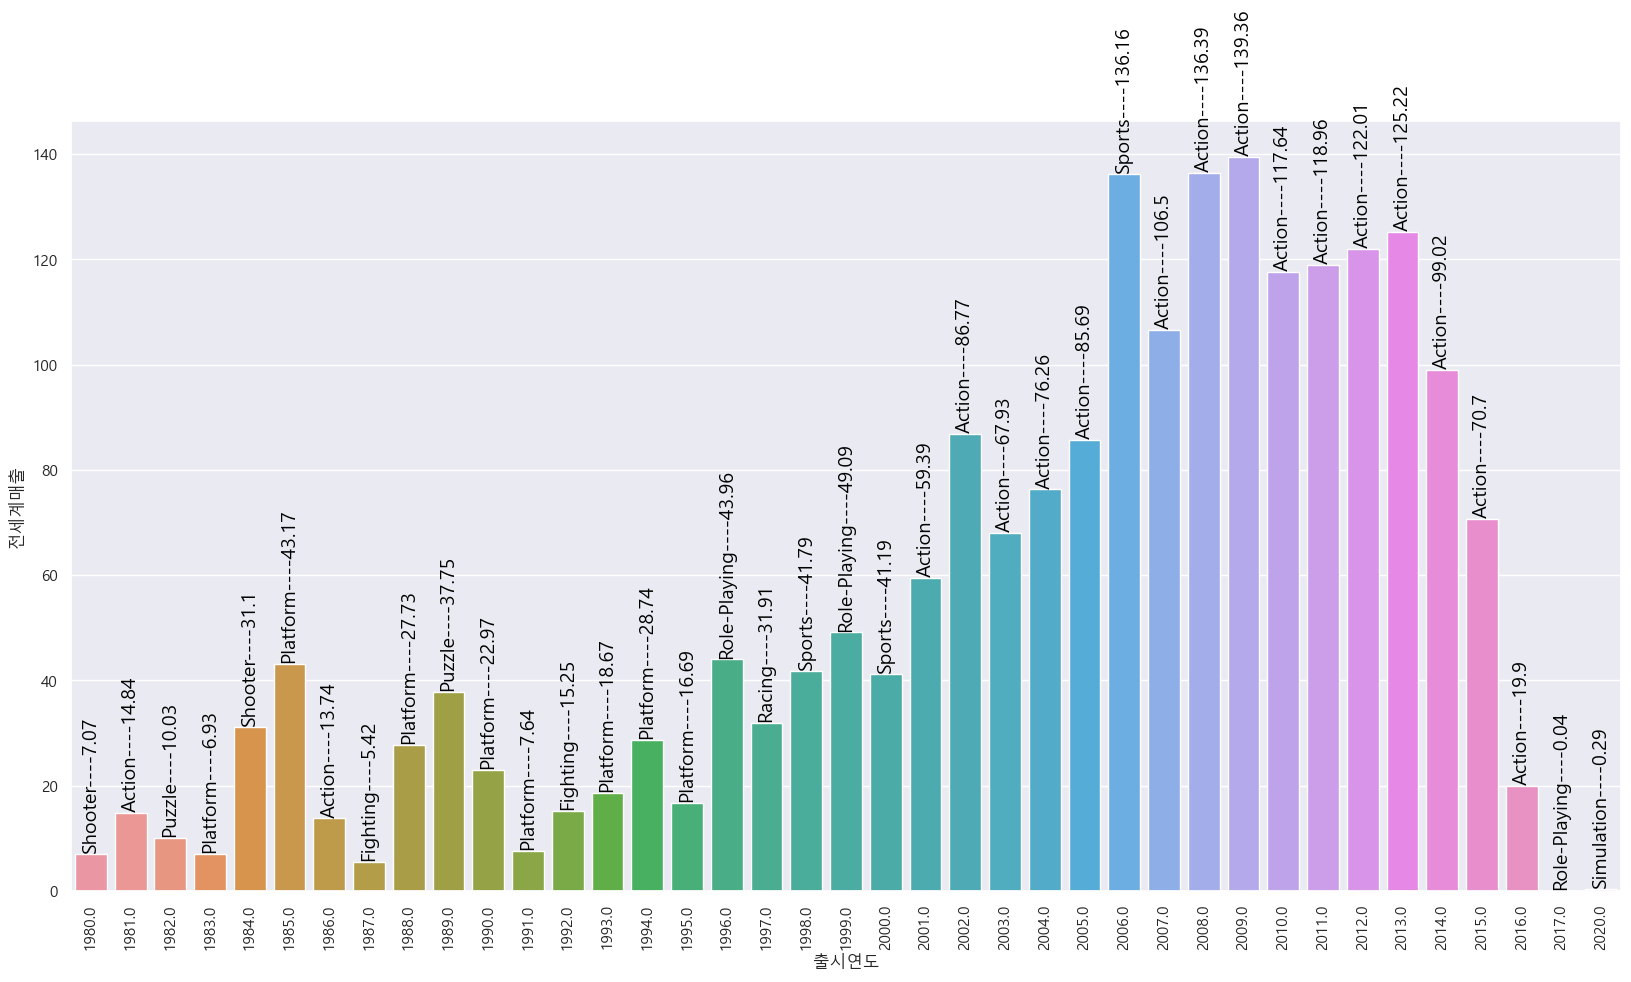

In [230]:
plt.figure(figsize=(20, 10))
g = sns.barplot(x='출시연도', y='전세계매출', data=year_sale_max)
index = 0
for value in year_sale_max['전세계매출']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
pass


-2009년 Action장르가 가장 많이 판매됬다 139.36

7. 세계적으로 판매가격이 제일 높은 장르게임

In [231]:
df_genre = df.groupby(by = ['장르'])['전세계매출'].sum()
df_genre = df_genre.reset_index()
df_genre = df_genre.sort_values(by = ['전세계매출'], ascending=False)

<AxesSubplot: xlabel='장르', ylabel='전세계매출'>

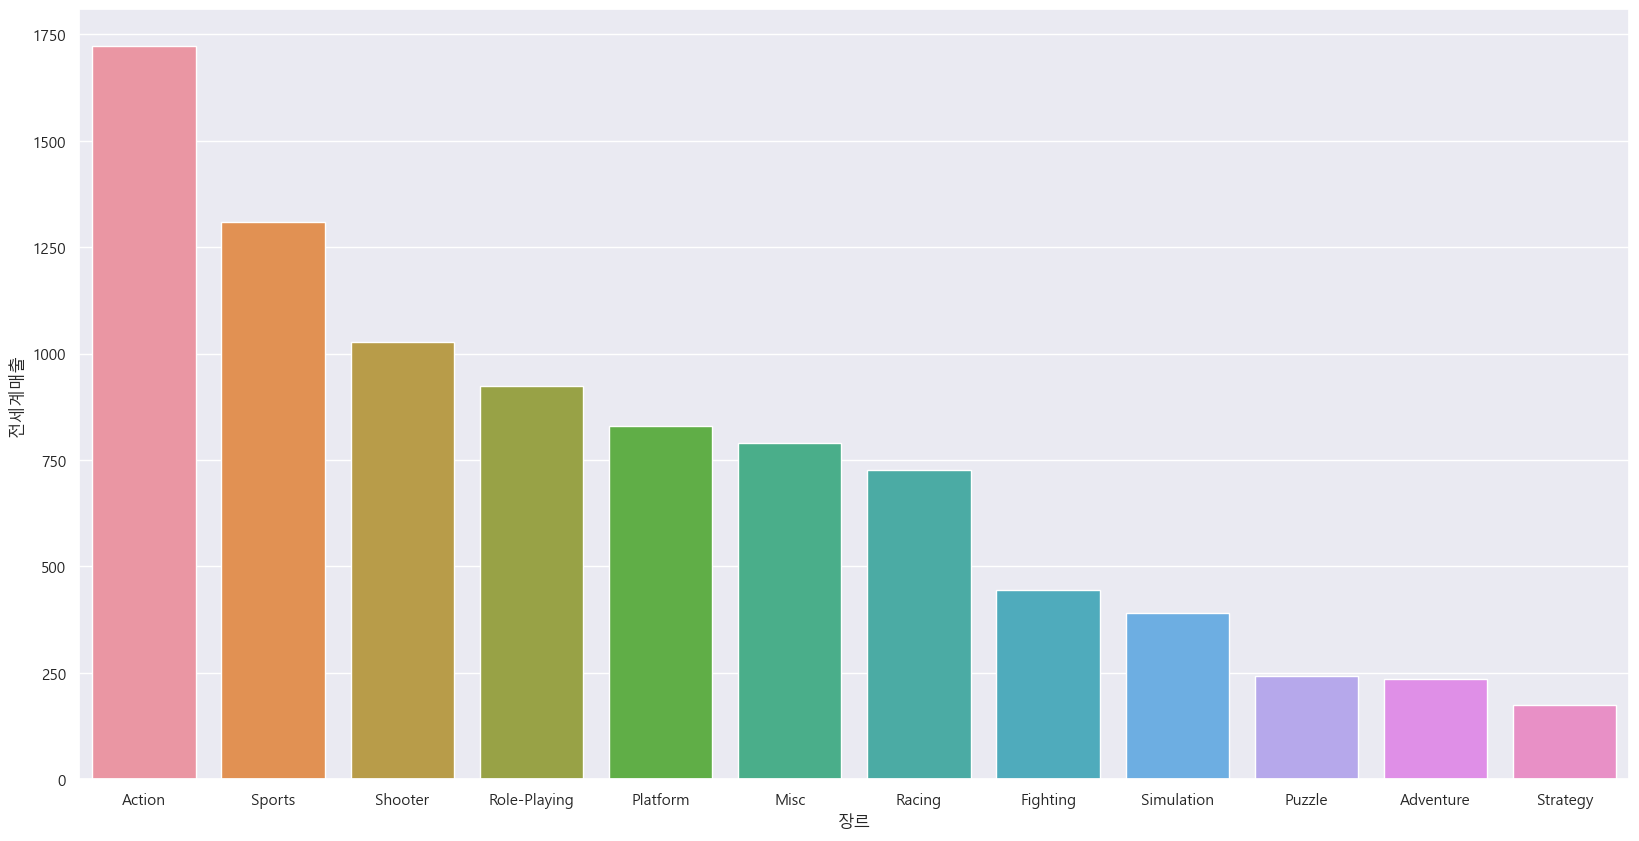

In [232]:
plt.figure(figsize=(20,10))
sns.barplot(x = '장르', y = '전세계매출', data = df_genre)

- 당연하게 Action과 Sports가 판매가격이 높지만, Shooter 판매가격도 높다는걸 알수 있다.

8. 전세계적으로 판매가격이 높은 플랫폼

In [233]:
df_platform = df.groupby(by=['플랫폼'])['전세계매출'].sum()
df_platform = df_platform.reset_index()
df_platform = df_platform.sort_values(by=['전세계매출'], ascending=False)

<AxesSubplot: xlabel='플랫폼', ylabel='전세계매출'>

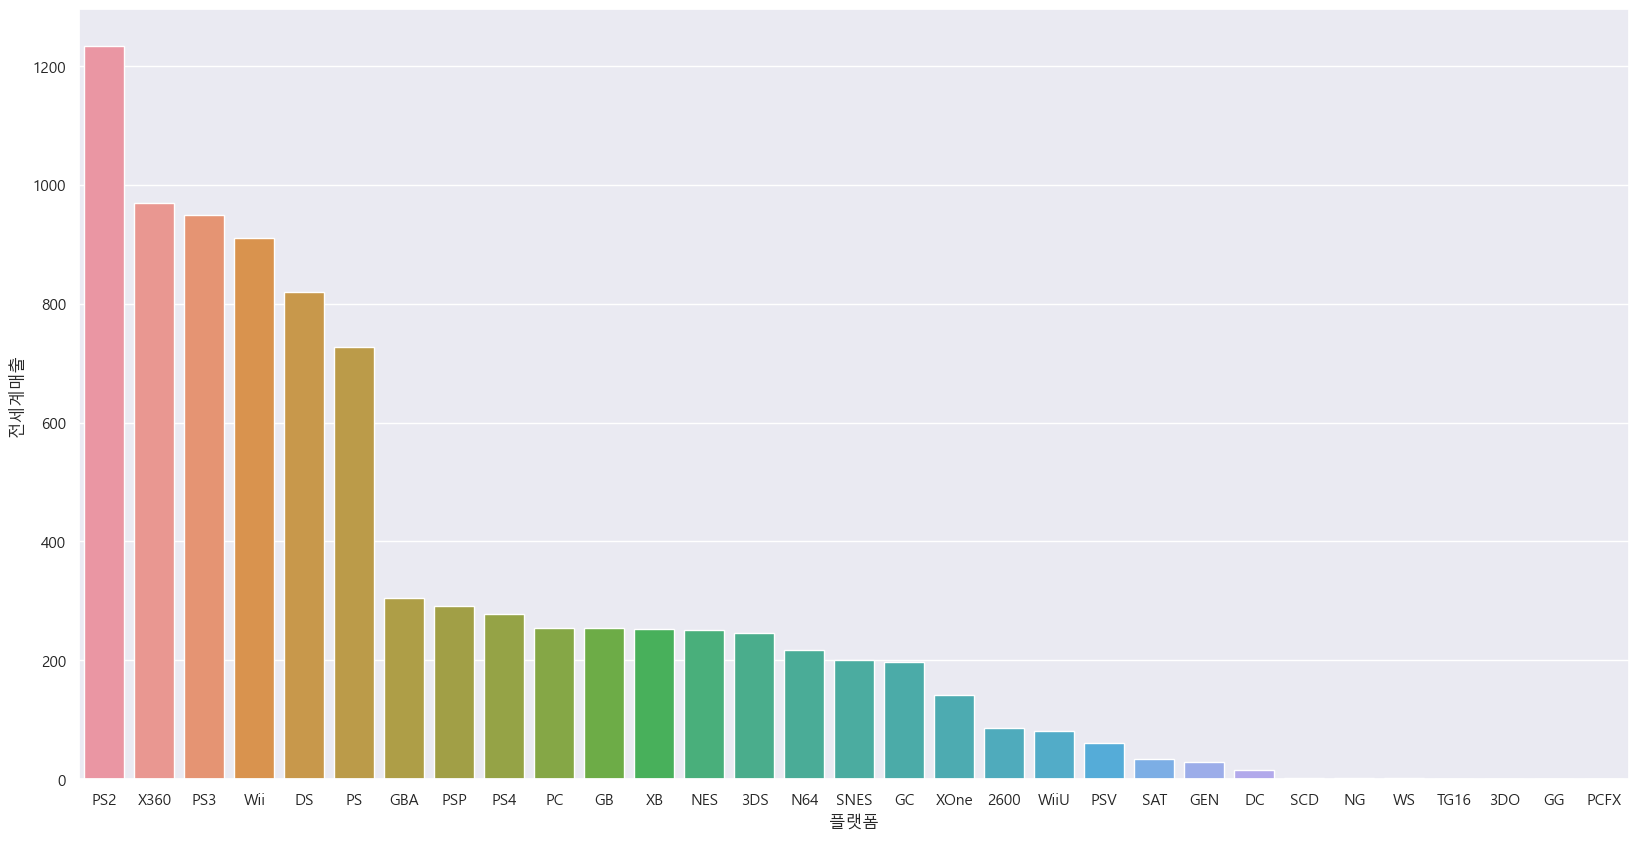

In [234]:
plt.figure(figsize=(20, 10))
sns.barplot(x="플랫폼", y="전세계매출", data=df_platform)


-상위에 PS2, X360,PS3,Will 가 있다.

9. 전세계 적으로 판매가격이 제일높은 게임

In [235]:
top_game = df.head(20)
top_game = top_game[['이름', '출시연도', '장르', '전세계매출']]
top_game = top_game.sort_values(by=['전세계매출'], ascending=False)

In [236]:
name = top_game['이름']
year = top_game['출시연도']
y = np.arange(0, 20)

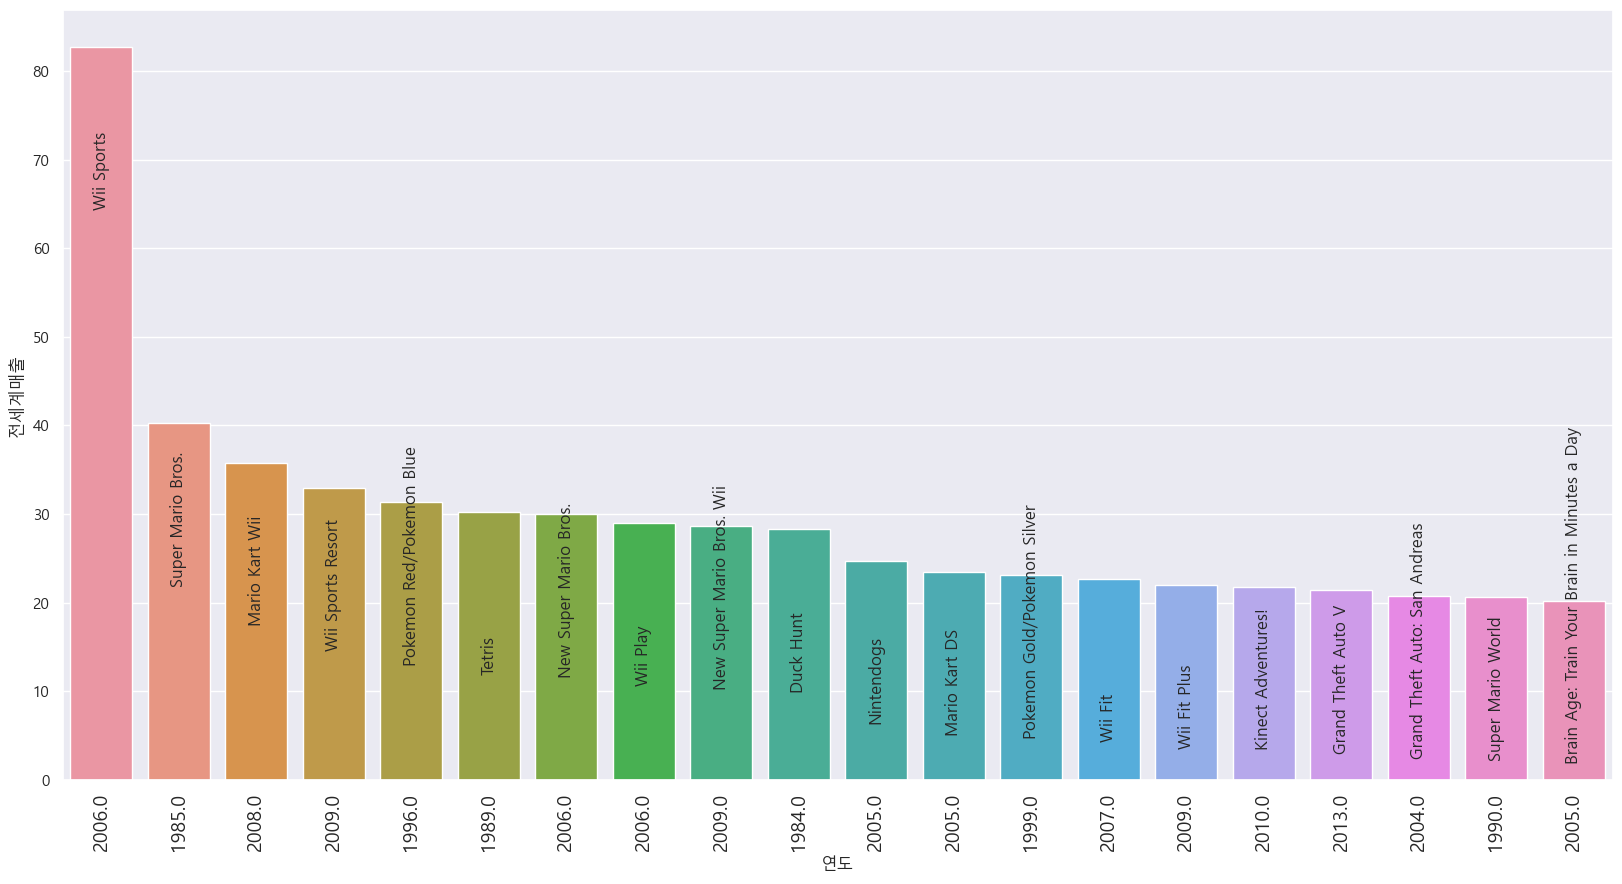

In [237]:
plt.figure(figsize=(20, 10))
g = sns.barplot(x='이름', y='전세계매출', data=top_game)
index = 0
for i in top_game['전세계매출']:
    g.text(index, i - 18, name[index], rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game['출시연도'], fontsize=14, rotation=90)
plt.xlabel('연도')
pass

- 2006년에 Will Sports가 전세계 매출 82.74로 판매가격이 높은걸 볼수있다

10. 장르 별 매출비교

In [206]:
df.head()

,순위,이름,플랫폼,출시연도,장르,퍼블리셔,북미매출,유럽매출,일본매출,기타매출,전세계매출
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [207]:
df1_geure = df[['장르','북미매출','유럽매출','일본매출','기타매출']]
df1_geure.columns = ['Geure','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
df1_map = df1_geure.groupby(by = ['Geure']).sum()

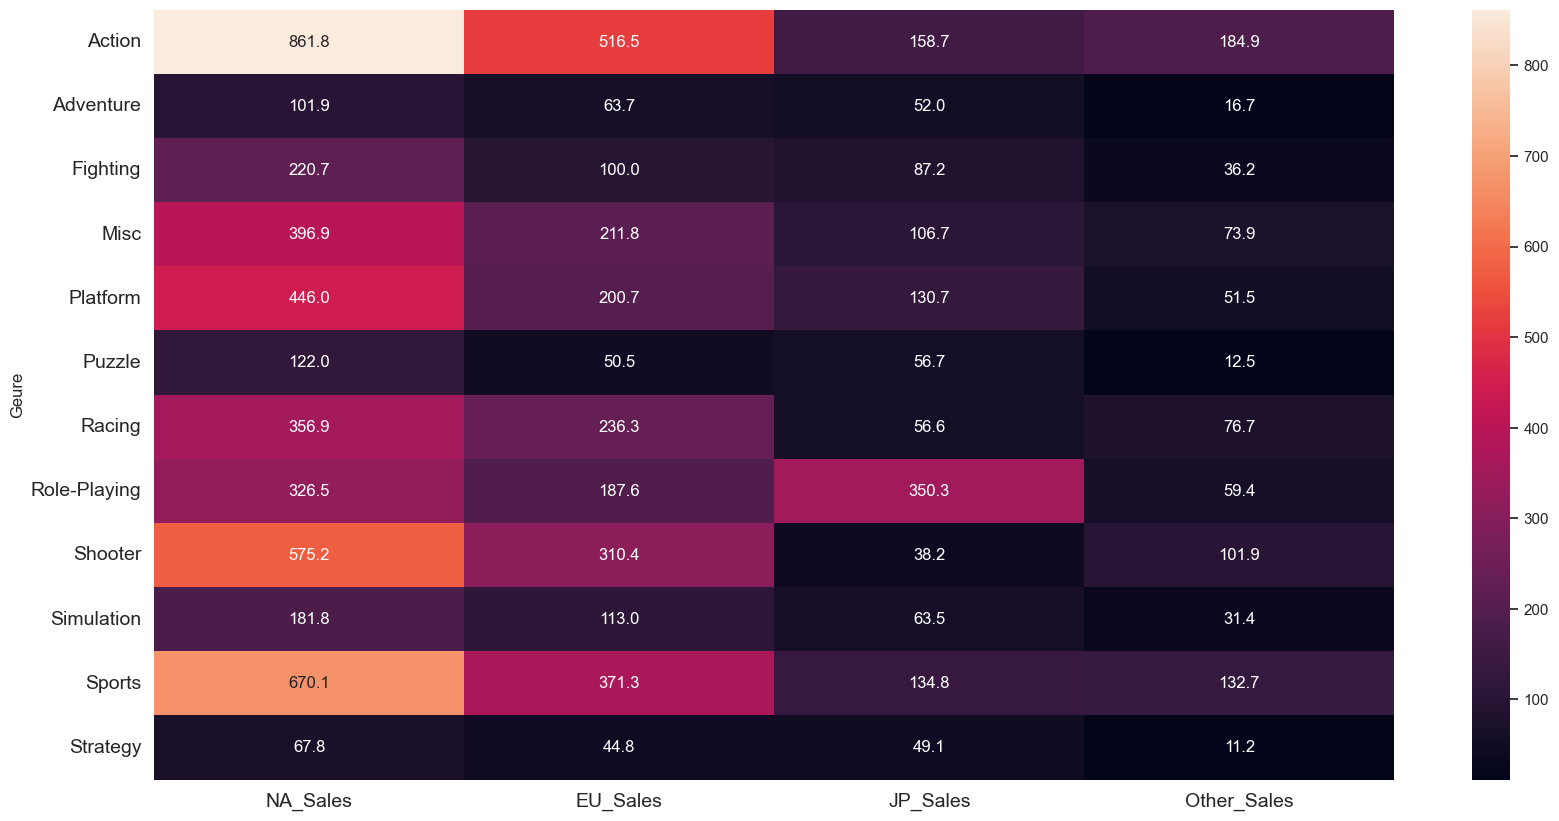

In [208]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(df1_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
pass

In [209]:
df_table = df1_map.reset_index()
df_table.columns = ['장르','북미매출','유럽매출','일본매출','기타매출']
df_table = pd.melt(df_table, id_vars=['장르'], value_vars=['북미매출', '유럽매출', '일본매출', '기타매출'], var_name='판매지역', value_name='판매가격')
df_table.head()

,장르,판매지역,판매가격
0,Action,북미매출,861.77
1,Adventure,북미매출,101.93
2,Fighting,북미매출,220.74
3,Misc,북미매출,396.92
4,Platform,북미매출,445.99


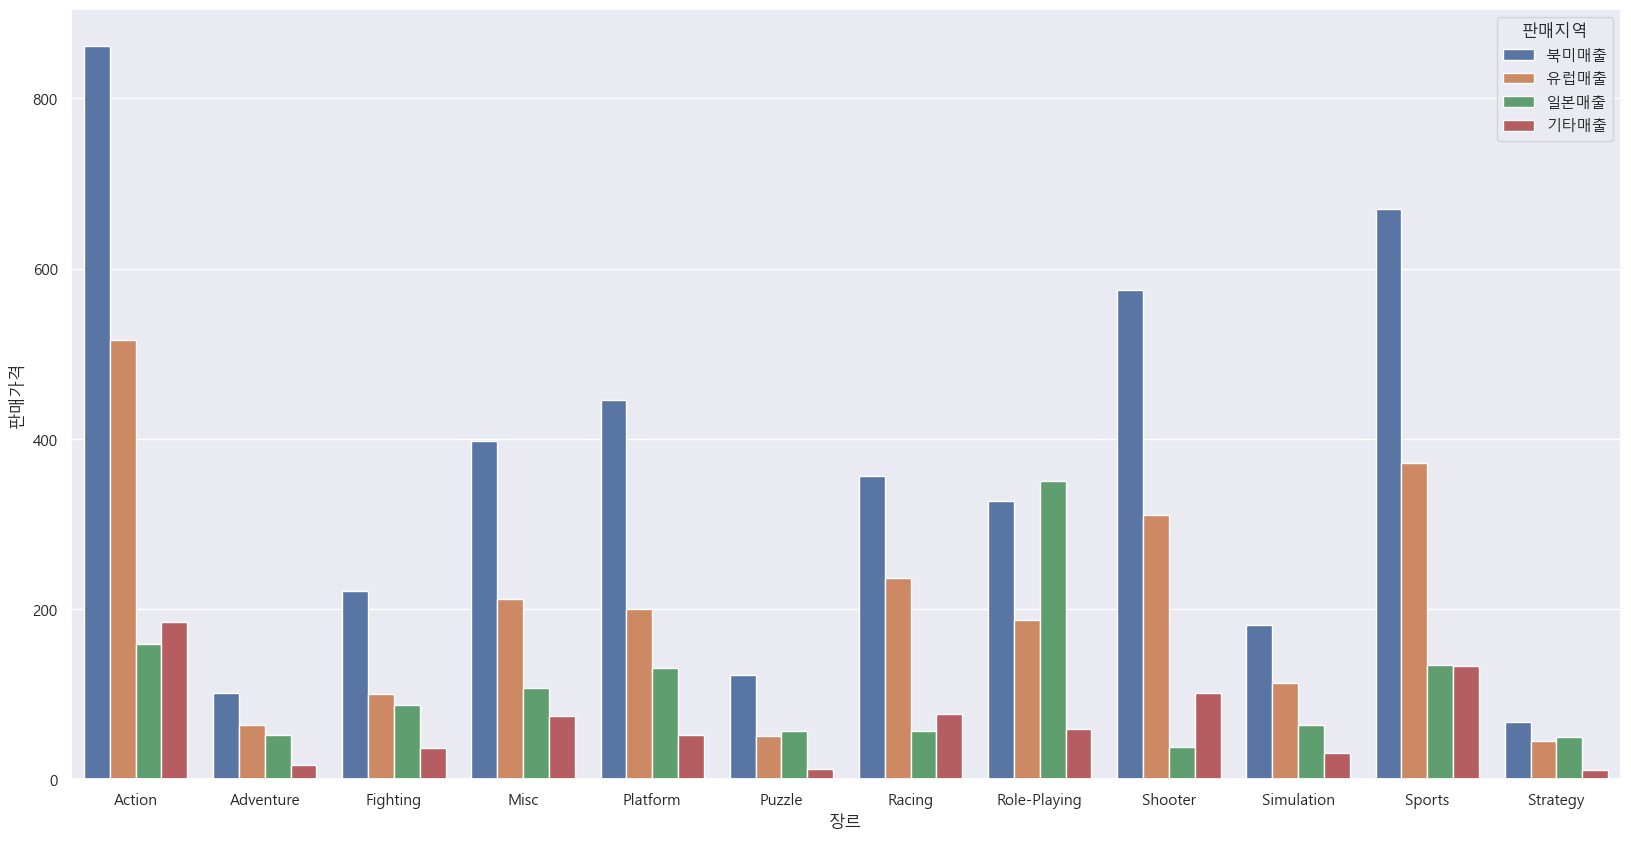

In [238]:
plt.figure(figsize=(20, 10))
sns.barplot(x = '장르', y = '판매가격', hue = '판매지역', data = df_table)
pass

11. 플랫폼별 매출 비교

In [241]:
df_platform = df[['플랫폼', '북미매출', '유럽매출', '일본매출', '기타매출']]
df_platform.head()

,플랫폼,북미매출,유럽매출,일본매출,기타매출
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [243]:
df_platform = df_platform.groupby(by=['플랫폼']).sum().reset_index()

In [244]:
df_table = pd.melt(df_platform, id_vars=['플랫폼'], value_vars=['북미매출', '유럽매출', '일본매출', '기타매출'], var_name='판매지역', value_name='판매가격')
df_table.head()

,플랫폼,판매지역,판매가격
0,2600,북미매출,80.78
1,3DO,북미매출,0.00
2,3DS,북미매출,78.03
3,DC,북미매출,5.43
4,DS,북미매출,388.53


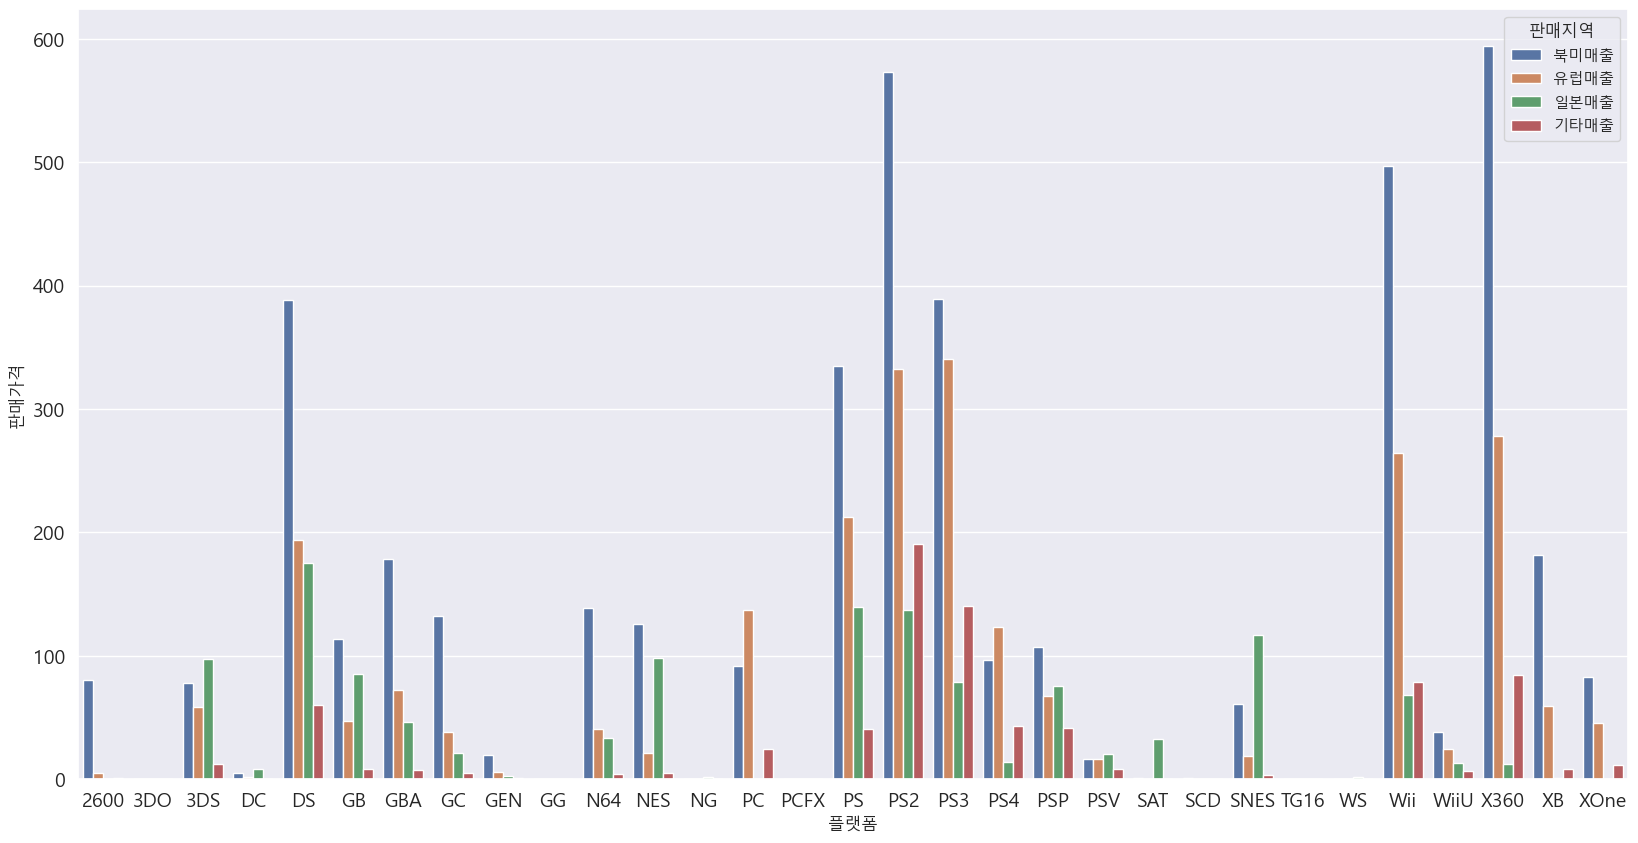

In [247]:
plt.figure(figsize=(20, 10))
sns.barplot(x='플랫폼', y='판매가격', hue='판매지역', data=df_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
pass

-X360, Will, Ps가 매출이 가장높은걸 알수있고, 북미유저들이 비디오게임을 많이 한다는것을 알수있다.

12. 상위 퍼블리셔 20

In [248]:
df.head()

,순위,이름,플랫폼,출시연도,장르,퍼블리셔,북미매출,유럽매출,일본매출,기타매출,전세계매출
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [256]:
df_top = df.groupby(by = ['퍼블리셔'])['출시연도'].count().sort_values(ascending=False).head(20)
pd.DataFrame(df_top).reset_index()

,퍼블리셔,출시연도
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823
5,THQ,712
6,Nintendo,696
7,Sony Computer Entertainment,682
8,Sega,632
9,Take-Two Interactive,412


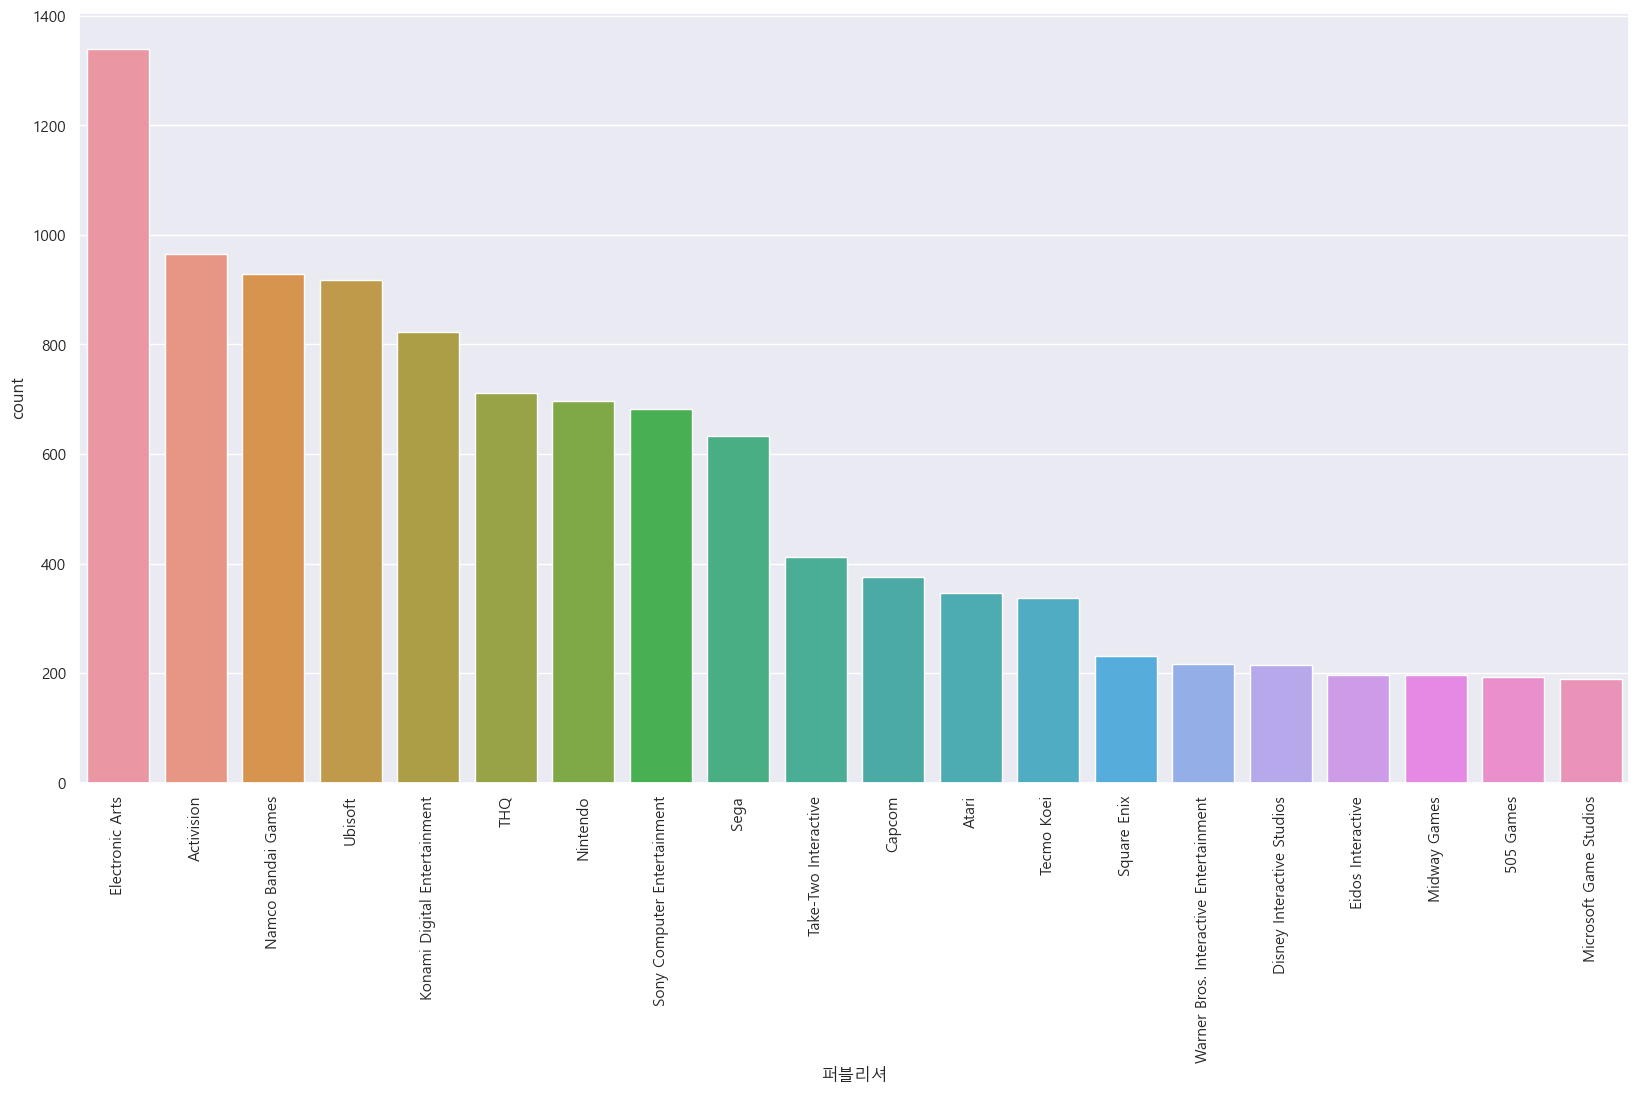

In [255]:
plt.figure(figsize=(20, 10))
sns.countplot(x="퍼블리셔", data=df, order = df.groupby(by=['퍼블리셔'])['출시연도'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)
pass

- Electrinoc Arts가 1339로 가장 높은 수치를 보여준다.

13. 전세계 매출 1위 퍼블리셔

In [261]:
sale_df = df[['퍼블리셔', '전세계매출']]
sale_dfl = sale_df.groupby('퍼블리셔')['전세계매출'].sum().sort_values(ascending=False).head(20)
sale_df2 = pd.DataFrame(sale_dfl).reset_index()
sale_df2

,퍼블리셔,전세계매출
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54
5,Take-Two Interactive,399.30
6,THQ,340.44
7,Konami Digital Entertainment,278.56
8,Sega,270.70
9,Namco Bandai Games,253.65


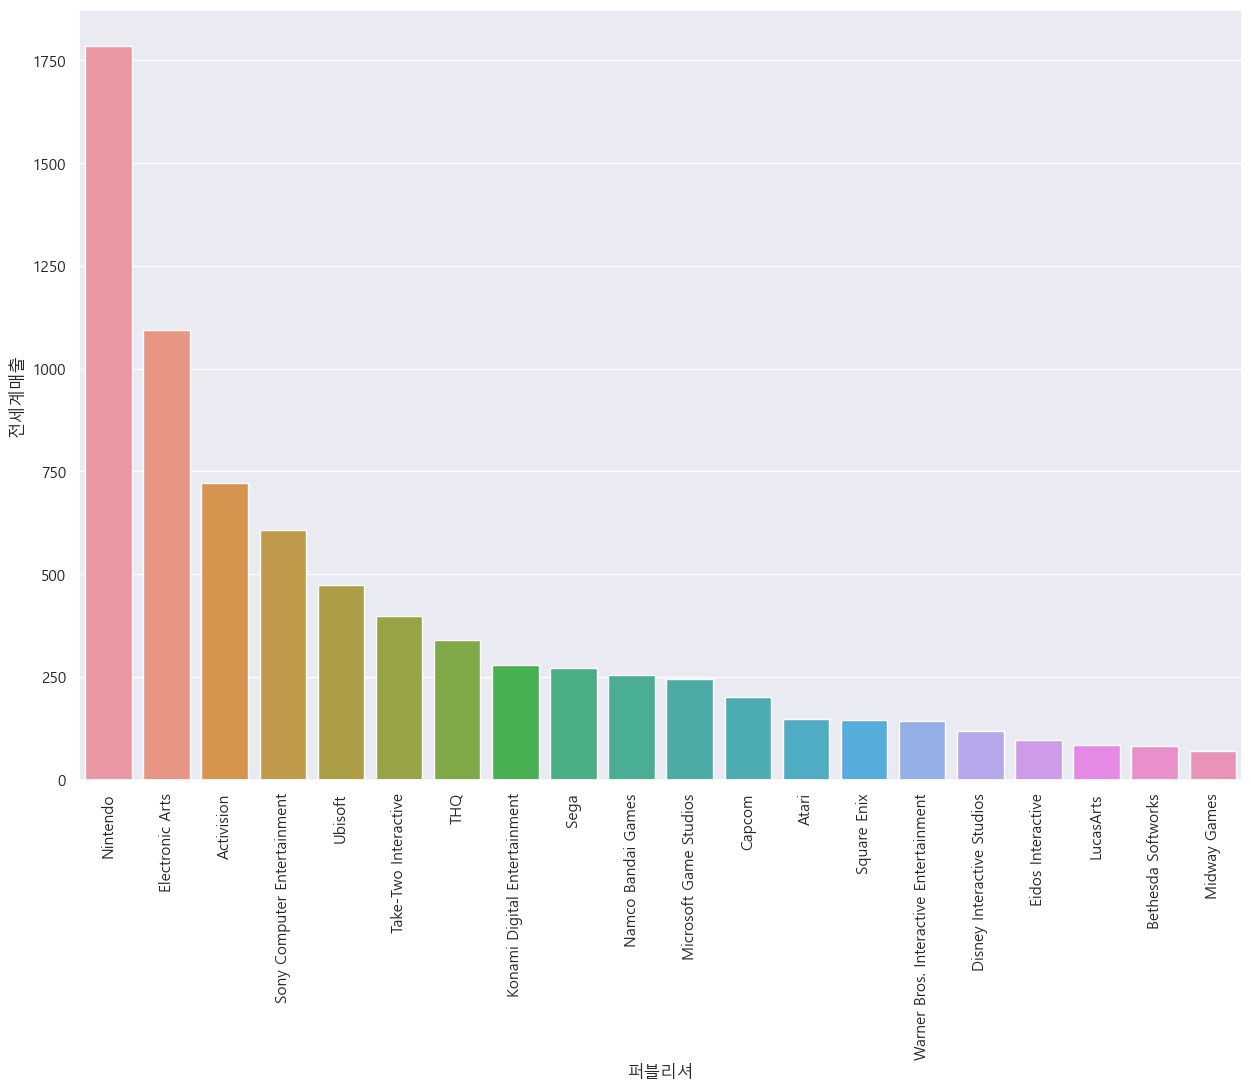

In [260]:
plt.figure(figsize=(15, 10))
sns.barplot(x='퍼블리셔', y='전세계매출', data=sale_df2)
plt.xticks(rotation=90)
pass

- Nintendo가 1784.43로 매출이 가장 높다.

14. 퍼블리셔 비교

In [262]:
df_publisher = df[['퍼블리셔', '북미매출', '유럽매출', '일본매출', '기타매출', '전세계매출']]
df_publisher.head()

,퍼블리셔,북미매출,유럽매출,일본매출,기타매출,전세계매출
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [264]:
df_publisher = df_publisher.groupby(by=['퍼블리셔']).sum().reset_index().sort_values(by=['전세계매출'], ascending=False)
df_publisher = df_publisher.head(20)

In [265]:
df_publisher = pd.melt(df_publisher, id_vars=['퍼블리셔'], value_vars=['북미매출', '유럽매출', '일본매출', '기타매출'], var_name='판매지역', value_name='판매가격')
df_publisher

,퍼블리셔,판매지역,판매가격
0,Nintendo,북미매출,815.75
1,Electronic Arts,북미매출,584.22
2,Activision,북미매출,426.01
3,Sony Computer Entertainment,북미매출,265.22
4,Ubisoft,북미매출,252.81
...,...,...,...
75,Disney Interactive Studios,기타매출,13.15
76,Eidos Interactive,기타매출,7.90
77,LucasArts,기타매출,10.28
78,Bethesda Softworks,기타매출,10.10


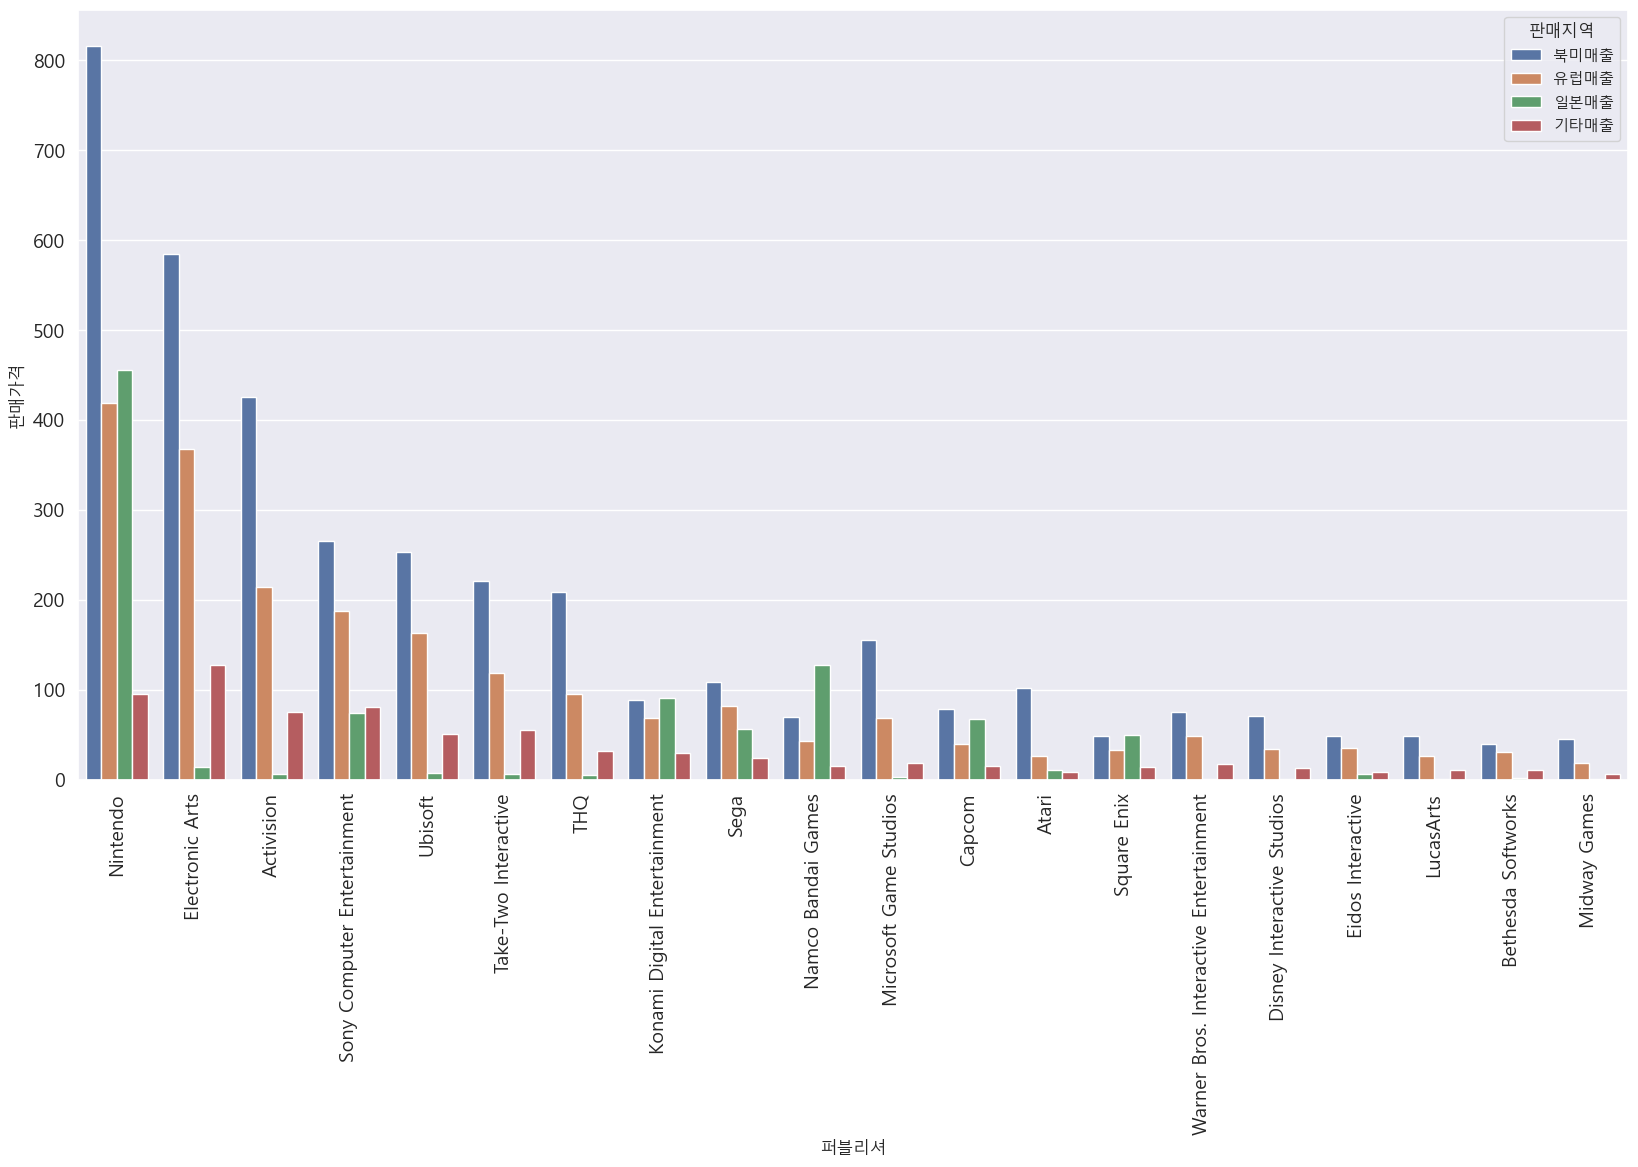

In [267]:
plt.figure(figsize=(20, 10))
sns.barplot(x='퍼블리셔', y='판매가격', hue='판매지역', data=df_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
pass

15. 지역 총 매출

In [269]:
top_sale = df[['북미매출', '유럽매출', '일본매출', '기타매출']]
top_sale = top_sale.sum().reset_index()
top_sale = top_sale.rename(columns={"index": "지역", 0: "가격"})
top_sale

,지역,가격
0,북미매출,4327.65
1,유럽매출,2406.69
2,일본매출,1284.27
3,기타매출,788.91


<AxesSubplot: xlabel='지역', ylabel='가격'>

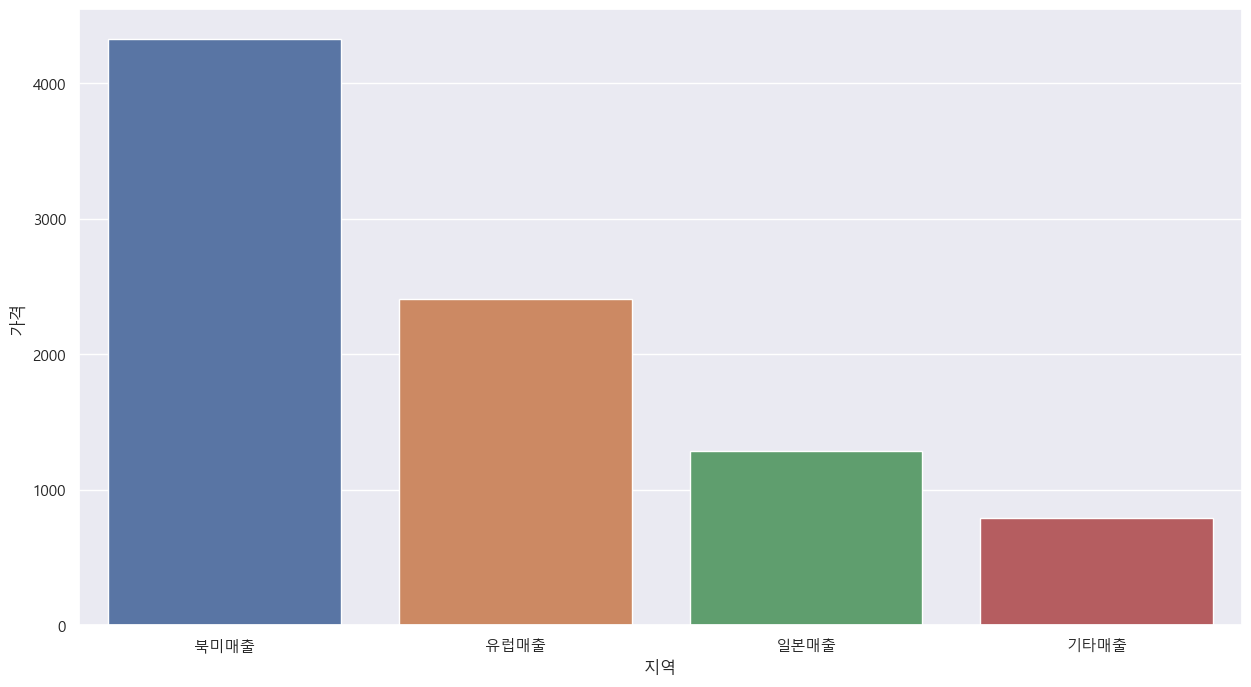

In [270]:
plt.figure(figsize=(15, 8))
sns.barplot(x='지역', y='가격', data = top_sale)

15. 지역별 총 매출

In [271]:
labels = top_sale['지역']
sizes = top_sale['가격']

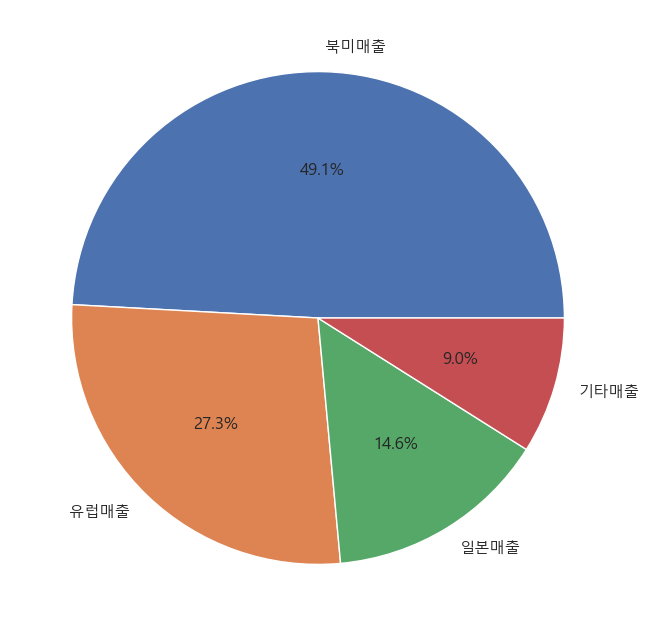

In [274]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
pass

16. 상관관계

C:\Users\jkh75\AppData\Local\Temp\ipykernel_7676\1947944465.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "Blues", annot=True, linewidth=3)


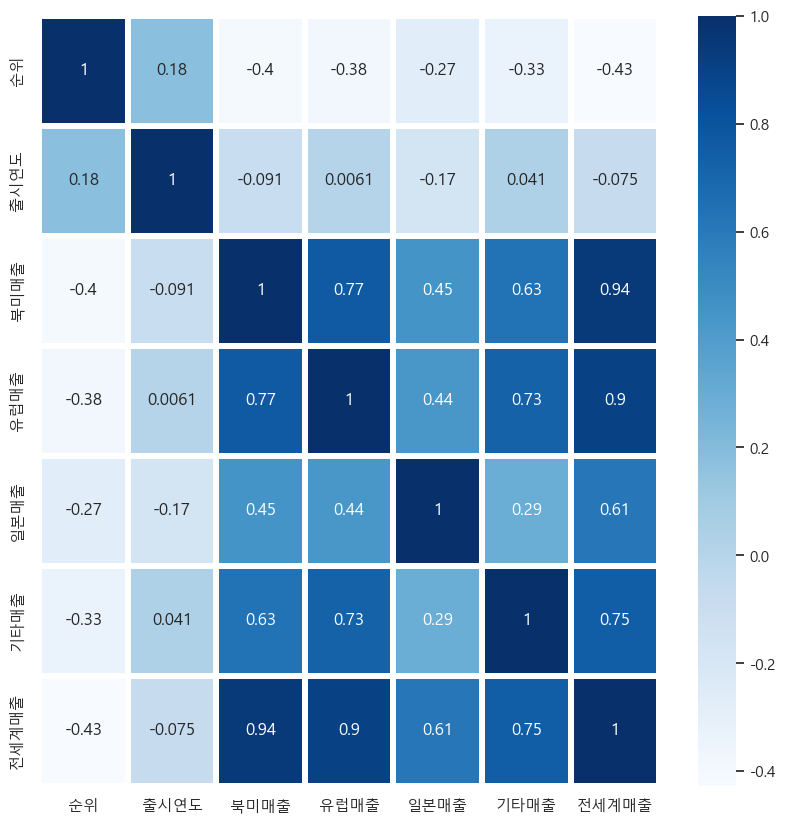

In [279]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap = "Blues", annot=True, linewidth=3)
pass

18. 열의 관계

In [282]:
df_pair = df.loc[:,["출시연도","퍼블리셔", "장르", "북미매출","유럽매출","일본매출","기타매출"]]
df_pair

,출시연도,퍼블리셔,장르,북미매출,유럽매출,일본매출,기타매출
0,2006.0,Nintendo,Sports,41.49,29.02,3.77,8.46
1,1985.0,Nintendo,Platform,29.08,3.58,6.81,0.77
2,2008.0,Nintendo,Racing,15.85,12.88,3.79,3.31
3,2009.0,Nintendo,Sports,15.75,11.01,3.28,2.96
4,1996.0,Nintendo,Role-Playing,11.27,8.89,10.22,1.00
...,...,...,...,...,...,...,...
16593,2002.0,Kemco,Platform,0.01,0.00,0.00,0.00
16594,2003.0,Infogrames,Shooter,0.01,0.00,0.00,0.00
16595,2008.0,Activision,Racing,0.00,0.00,0.00,0.00
16596,2010.0,7G//AMES,Puzzle,0.00,0.01,0.00,0.00


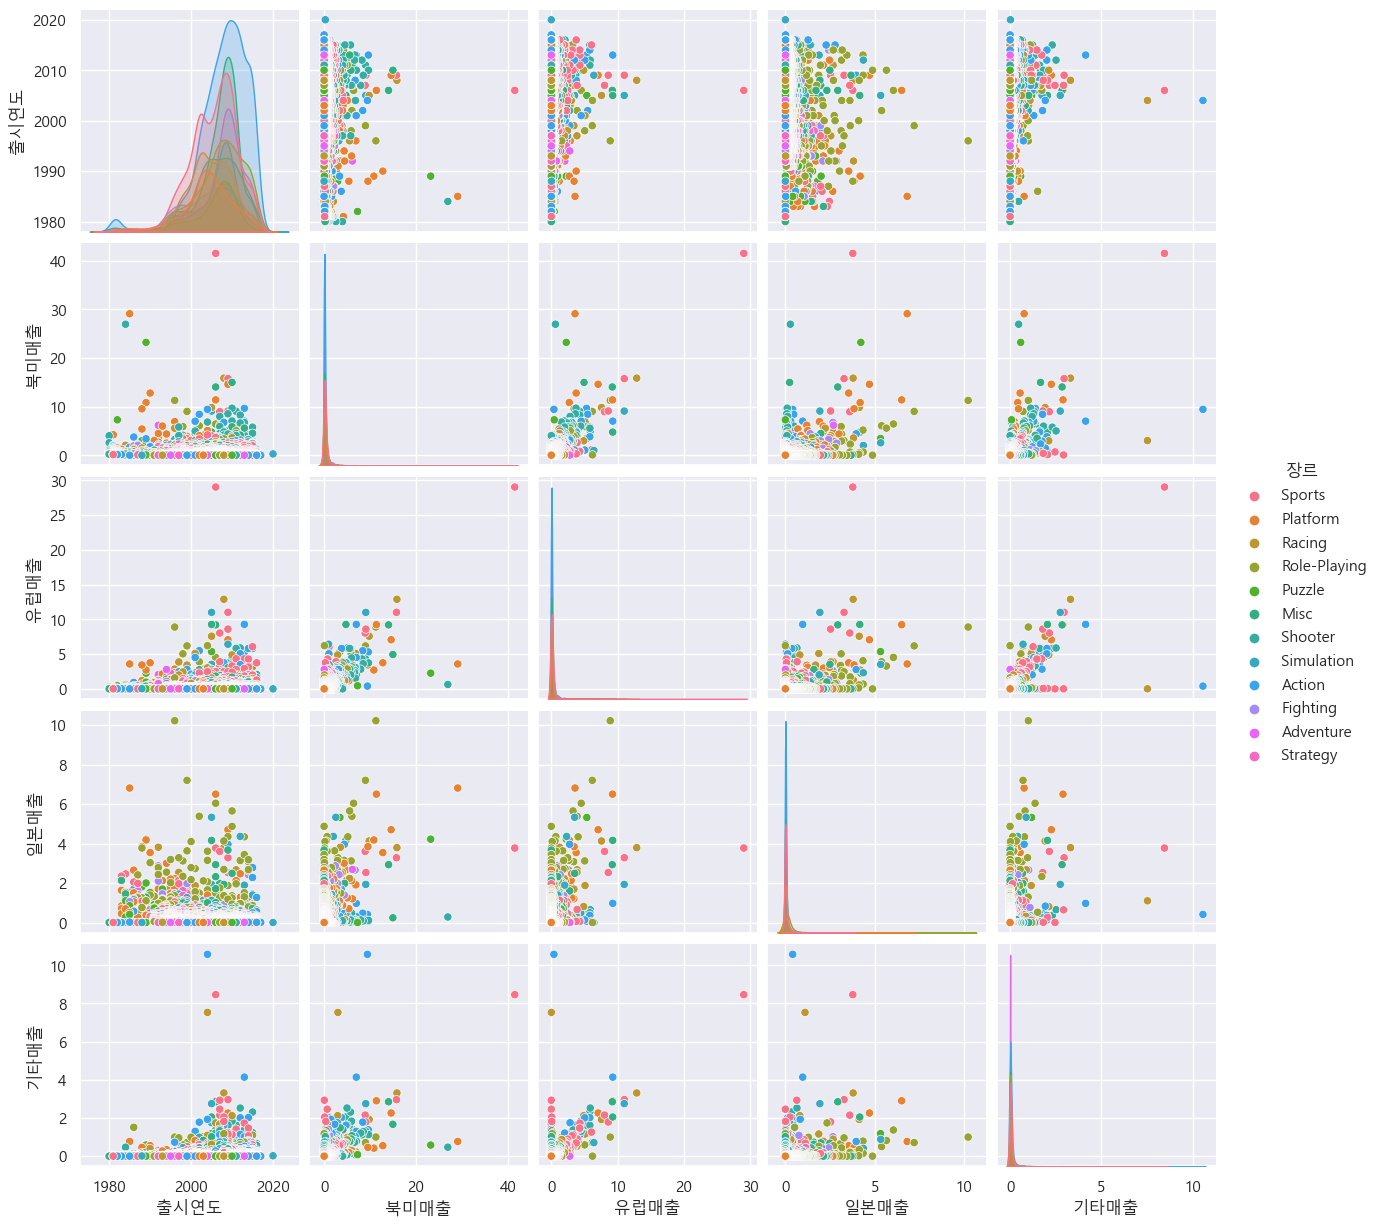

In [284]:
sns.pairplot(df_pair, hue='장르')